In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing and reading the file
import os 
os.chdir("D:\Simplilearn\Machine Learning\Biomedical  Project\Stroke Detection")

stroke_data=pd.read_csv('stroke data.csv')

In [3]:
# checking the data with .head function for default first 5 rows
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# checking the types of data present in the stroke_data
stroke_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
# checking the shape of the data
print(stroke_data.shape)

(5110, 12)


In [6]:
# checking the columns of the data
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
# dropping the column id as it is not giving any information
stroke_data=stroke_data.drop(['id'],axis=1)

In [8]:
# dropping the dependant column (stroke)
stroke_data1=stroke_data.drop(['stroke'],axis=1)

In [9]:
print(stroke_data1.shape)

(5110, 10)


In [10]:
stroke_data1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [11]:
stroke_data1.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237
std,22.612647,0.296607,0.226063,45.283560,7.854067
min,0.080000,0.000000,0.000000,55.120000,10.300000
25%,25.000000,0.000000,0.000000,77.245000,23.500000
50%,45.000000,0.000000,0.000000,91.885000,28.100000
75%,61.000000,0.000000,0.000000,114.090000,33.100000
max,82.000000,1.000000,1.000000,271.740000,97.600000


In [12]:
# checking the null values in the data
stroke_data1.isnull().sum().sort_values(ascending=False)

bmi                  201
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
dtype: int64

In [13]:
# splitting the data accourding to its type then fill the null values
numericdata=stroke_data1.select_dtypes(include=np.number)
objectdata=stroke_data1.select_dtypes(include=np.object)

In [14]:
print(numericdata.shape)
print(objectdata.shape)

(5110, 5)
(5110, 5)


In [15]:
numericdata.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
1,61.0,0,0,202.21,NaN
2,80.0,0,1,105.92,32.5
3,49.0,0,0,171.23,34.4
4,79.0,1,0,174.12,24.0


In [16]:
numericdata.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
# filling null values with median with Simple Impute
si=SimpleImputer(missing_values=np.nan,strategy='median')

In [19]:
numericdata=si.fit_transform(numericdata)

In [20]:
labels=stroke_data1.select_dtypes(include=np.number).columns

In [21]:
numericdata_df=pd.DataFrame(numericdata,columns=labels)

In [22]:
numericdata_df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0.0,1.0,228.69,36.6
1,61.0,0.0,0.0,202.21,28.1
2,80.0,0.0,1.0,105.92,32.5
3,49.0,0.0,0.0,171.23,34.4
4,79.0,1.0,0.0,174.12,24.0


In [23]:
# checking the null values if present
numericdata_df.isnull().sum().sort_values(ascending=False)

age                  0
hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
dtype: int64

<AxesSubplot:>

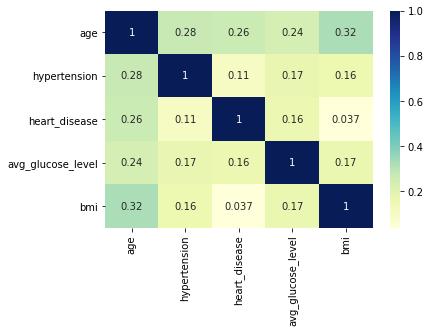

In [24]:
# plottong the heatmap
sns.heatmap(numericdata_df.corr(), annot=True, cmap="YlGnBu")

<AxesSubplot:>

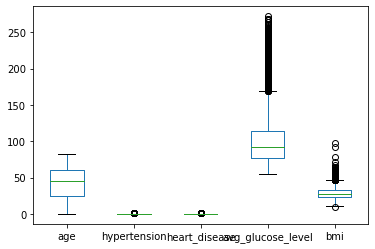

In [25]:
#plotting the numericdata_df
numericdata_df.plot(kind='box') # not removing the outliers as it is important data 

<AxesSubplot:ylabel='Density'>

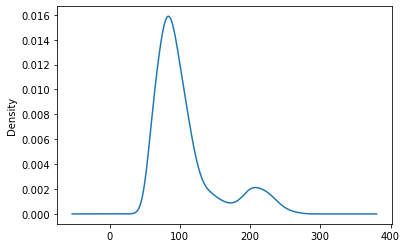

In [26]:
# plotting the data in avg_glucose_level in numeric data to see the how it is distributed
numericdata_df.avg_glucose_level.plot(kind='density')

In [27]:
# correcting the positive skewness and kurtosis
numericdata_df['avg_glucose_level']=np.sqrt(numericdata_df['avg_glucose_level'])

<AxesSubplot:ylabel='Density'>

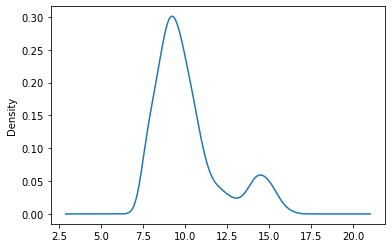

In [28]:
numericdata_df.avg_glucose_level.plot(kind='density')

<AxesSubplot:ylabel='Density'>

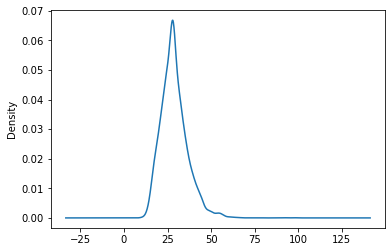

In [29]:
# plotting the data in bmi in numeric data to see the how it is distributed
numericdata_df.bmi.plot(kind='density')

In [30]:
# # correcting the positive skewness and kurtosis (can not remove correcting to the certain level)
numericdata_df['bmi']=np.log(numericdata_df['bmi'])

<AxesSubplot:ylabel='Density'>

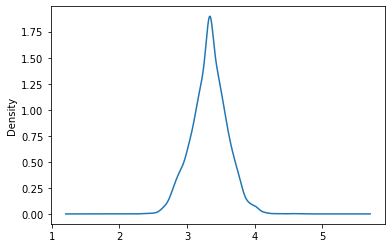

In [31]:
numericdata_df.bmi.plot(kind='density')

In [32]:
objectdata.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


In [33]:
# checking the null values in the object data
objectdata.isnull().sum().sort_values(ascending=False)

gender            0
ever_married      0
work_type         0
Residence_type    0
smoking_status    0
dtype: int64

In [34]:
# checking the unique values in the objectdata work_type column
objectdata.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [35]:
#converting to numeric data
from sklearn.preprocessing import LabelEncoder

In [36]:
le=LabelEncoder()

In [37]:
objectdata=objectdata.apply(le.fit_transform)

In [38]:
objectdata.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,1,1,2,1,1
1,0,1,3,0,2
2,1,1,2,0,2
3,0,1,2,1,3
4,0,1,3,0,2


In [39]:
# reseting index for the both the dataset
objectdata.reset_index(drop=True, inplace=True)
numericdata_df.reset_index(drop=True, inplace=True)

In [40]:
# combing both the data
combinedata=pd.concat([numericdata_df,objectdata],axis=1)

In [41]:
combinedata.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status
0,67.0,0.0,1.0,15.122500,3.600048,1,1,2,1,1
1,61.0,0.0,0.0,14.220056,3.335770,0,1,3,0,2
2,80.0,0.0,1.0,10.291744,3.481240,1,1,2,0,2
3,49.0,0.0,0.0,13.085488,3.538057,0,1,2,1,3
4,79.0,1.0,0.0,13.195454,3.178054,0,1,3,0,2


In [42]:
combinedata.shape

(5110, 10)

In [43]:
# defining X as independant features and y as dependant feature 
X=combinedata
y=stroke_data.stroke

In [44]:
y.unique()

array([1, 0], dtype=int64)

In [45]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [46]:
#spliting into train test 
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
# applying Logistic Regression algorithm
from sklearn.linear_model import LogisticRegression

In [49]:
model_lr=LogisticRegression(solver='liblinear')

In [50]:
model_lr.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [51]:
y_pred=model_lr.predict(X_train)

In [52]:
# checking the accuracy of the model
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3901
           1       0.00      0.00      0.00       187

    accuracy                           0.95      4088
   macro avg       0.48      0.50      0.49      4088
weighted avg       0.91      0.95      0.93      4088



In [54]:
# checking model accuracy with cross validation 
from sklearn.model_selection import cross_val_score

In [55]:
results_lr=cross_val_score(model_lr,X,y,cv=10)

In [56]:
print(results_lr)

[0.95107632 0.95107632 0.95107632 0.95107632 0.95107632 0.95107632
 0.95107632 0.95107632 0.95107632 0.95303327]


In [57]:
results_lr.mean()   # printing the mean of the cross validation of the model 

0.9512720156555773

In [58]:
# applying Gradient Boosting algorithm
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
model_gbc=GradientBoostingClassifier()

In [60]:
model_gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [61]:
y_pred=model_gbc.predict(X_train)

In [62]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3901
           1       1.00      0.13      0.23       187

    accuracy                           0.96      4088
   macro avg       0.98      0.56      0.60      4088
weighted avg       0.96      0.96      0.95      4088



In [63]:
pd.crosstab(y_train,y_pred)

col_0,0,1
stroke,,
0,3901,0
1,163,24


In [64]:
results=cross_val_score(model_gbc,X,y,cv=10)

In [65]:
print(results)

[0.95107632 0.94911937 0.94716243 0.95107632 0.94520548 0.94911937
 0.95107632 0.94716243 0.94911937 0.94716243]


In [66]:
results.mean() # printing the mean of the cross validation of the model 

0.9487279843444225

In [67]:
# applying K-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier

In [68]:
model_knn=KNeighborsClassifier()

In [69]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [70]:
y_pred=model_knn.predict(X_train)

In [71]:
# finding the accuracy and the errors (type 1 and 2)
pd.crosstab(y_train,y_pred)

col_0,0,1
stroke,,
0,3893,8
1,174,13


In [72]:
# finding the accuracy 
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3901
           1       0.62      0.07      0.12       187

    accuracy                           0.96      4088
   macro avg       0.79      0.53      0.55      4088
weighted avg       0.94      0.96      0.94      4088



In [74]:
results_knn=cross_val_score(model_knn,X,y,cv=10)

In [77]:
print(results_knn)

[0.95107632 0.94716243 0.94520548 0.94716243 0.94129159 0.94716243
 0.95303327 0.94324853 0.94716243 0.95499022]


In [78]:
results_knn.mean() # printing the mean of the cross validation of the model 

0.9477495107632092

In [80]:
# applying Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB

In [81]:
model_nb=GaussianNB()

In [82]:
model_nb.fit(X_train,y_train)

GaussianNB()

In [85]:
y_pred=model_nb.predict(X_train)

In [86]:
# finding the accuracy and the errors (type 1 and 2)
pd.crosstab(y_train,y_pred)

col_0,0,1
stroke,,
0,3495,406
1,119,68


In [87]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      3901
           1       0.14      0.36      0.21       187

    accuracy                           0.87      4088
   macro avg       0.56      0.63      0.57      4088
weighted avg       0.93      0.87      0.90      4088



In [89]:
results_nb=cross_val_score(model_nb,X,y,cv=10)

In [90]:
print(results_nb)

[0.87279843 0.87671233 0.85322896 0.87084149 0.84931507 0.8630137
 0.85127202 0.87866928 0.87475538 0.89823875]


In [91]:
results_nb.mean() # printing the mean of the cross validation of the model 

0.8688845401174168

In [93]:
# Logistic Regression model working best for the dataset with cross_validation mean of 95.12 %
